In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
train=pd.read_excel("Data_Train.xlsx")

In [3]:
test=pd.read_excel("Data_Test.xlsx")

In [4]:
train.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes


In [5]:
train.isnull().sum()

Restaurant       0
Location         0
Cuisines         0
Average_Cost     0
Minimum_Order    0
Rating           0
Votes            0
Reviews          0
Delivery_Time    0
dtype: int64

## Observation

1. Location and cuisines need cleaning
2. remove the rupee symbol from avg cost and min cost
3. check the rating and reviews . there is a relation between rating , votes and reviews 
4.  from target  remove minutes

In [6]:
## combining traoin and test dataset
combined=pd.concat([train,test],sort=False,ignore_index=True)

## univariate analysis

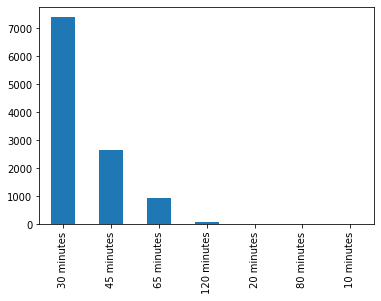

In [7]:
# Delivery time
combined.Delivery_Time.value_counts().plot(kind='bar')

In [8]:
combined.columns

Index(['Restaurant', 'Location', 'Cuisines', 'Average_Cost', 'Minimum_Order',
       'Rating', 'Votes', 'Reviews', 'Delivery_Time'],
      dtype='object')

In [9]:
combined.Reviews.unique()

array(['4', '30', '95', '235', '18', '31', '1235', '26', '294', '61',
       '1239', '-', '128', '5', '53', '47', '46', '23', '160', '2', '1',
       '38', '9', '19', '7', '132', '74', '13', '111', '499', '29', '34',
       '851', '513', '22', '27', '32', '25', '37', '8', '35', '6', '173',
       '36', '15', '174', '11', '59', '16', '89', '170', '10', '1660',
       '71', '41', '20', '40', '3', '191', '105', '100', '106', '21',
       '65', '69', '2547', '159', '110', '42', '181', '109', '179', '490',
       '28', '343', '118', '690', '72', '296', '33', '164', '50', '129',
       '1581', '234', '45', '2363', '24', '115', '12', '138', '175', '39',
       '66', '1603', '1443', '390', '108', '1457', '112', '107', '259',
       '269', '52', '196', '794', '589', '48', '145', '536', '247', '17',
       '49', '245', '87', '83', '54', '453', '318', '99', '205', '165',
       '1845', '766', '114', '44', '51', '104', '478', '70', '232', '435',
       '14', '659', '554', '399', '77', '88', '503',

In [10]:
combined.Votes.unique()

# missing dash in votes

array(['12', '11', '99', ..., '518', '666', '605'], dtype=object)

In [11]:
combined.Rating.unique()


array(['3.5', '3.6', '3.7', '3.2', '3.8', '4.0', '3.9', '4.2', '-', '2.8',
       '3.0', '3.3', '3.1', '4.7', '3.4', '4.1', 'NEW', '2.9', '4.6',
       '4.3', '2.6', '4.5', '4.4', '4.8', '2.4', '2.7', '2.5',
       'Opening Soon', '2.2', '4.9', '2.3', '2.1', 'Temporarily Closed'],
      dtype=object)

In [12]:
combined.Average_Cost.unique()

array(['₹200', '₹100', '₹150', '₹250', '₹650', '₹350', '₹800', '₹50',
       '₹400', '₹600', '₹300', '₹750', '₹450', '₹550', '₹1,000', '₹500',
       '₹900', '₹1,200', '₹950', '₹850', '₹700', '₹1,150', 'for',
       '₹1,100', '₹1,400', '₹2,050'], dtype=object)

In [13]:
combined.Minimum_Order.unique()

array(['₹50', '₹99', '₹0', '₹200', '₹450', '₹350', '₹79', '₹400', '₹199',
       '₹500', '₹250', '₹150', '₹90', '₹299', '₹300', '₹240', '₹89',
       '₹59', '₹149', '₹399'], dtype=object)

In [14]:
int(combined.Minimum_Order[0].split("₹")[1])

50

In [15]:
mylist=[]
for i in combined.Minimum_Order:
    mylist.append(int(i.split("₹")[1]))

In [16]:
combined["Minorder_Cleansed"]=pd.Series(mylist)

In [17]:
combined.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,Minorder_Cleansed
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes,50
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes,50
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes,50
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes,99
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes,99


In [ ]:
combined.loc[combined.Average_Cost=="for","Average_Cost"]='0'

In [20]:
cost=[]
for i in combined.Average_Cost:
    cost.append(int(i.replace("₹","").replace(",","")))

In [21]:
combined["AvgCost_Cleansed"]=pd.Series(cost)

In [22]:
## location

combined.Location[0].split(",")[-1]

' Pune'

In [23]:
locs=[]
for i in combined.Location:
    locs.append(i.split(", ")[-1])

In [24]:
combined["Location_Cleansed"]=pd.Series(locs)



In [25]:
combined.Location_Cleansed.unique()

array(['Pune', 'Marathalli', 'Mumbai Central', 'Noida', 'Whitefield',
       'Delhi University-GTB Nagar', 'Maharashtra', 'Timarpur', 'Kolkata',
       'Mumbai CST Area', 'Pune University', 'BTM Layout,Bangalore',
       'Gurgoan', 'Begumpet', 'Majestic', 'India Gate', 'Hyderabad',
       'Sector 63A,Gurgaon', 'Delhi Cantt.', 'Mumbai', 'Delhi',
       'Electronic City'], dtype=object)

In [26]:
combined.Location_Cleansed.replace(to_replace=['Marathalli', 'Whitefield','Majestic','BTM Layout,Bangalore','Electronic City'],value=["Banglore"]*5,inplace=True)

In [27]:
combined.Location_Cleansed.replace(to_replace=['Mumbai Central','Mumbai CST Area'],value=["Mumbai"]*2,inplace=True)

In [28]:
combined.Location_Cleansed.replace(to_replace=['Pune University','Maharashtra'],value=["Pune"]*2,inplace=True)

In [29]:
combined.Location_Cleansed.replace(to_replace=['Delhi Cantt.','India Gate','Timarpur','Delhi University-GTB Nagar'],value=["Delhi"]*4,inplace=True)

In [30]:
combined.Location_Cleansed.replace(to_replace=['Sector 63A,Gurgaon'],value=["Gurgoan"]*1,inplace=True)

In [31]:
combined.Location_Cleansed.replace(to_replace=['Begumpet'],value=["Hyderabad"]*1,inplace=True)

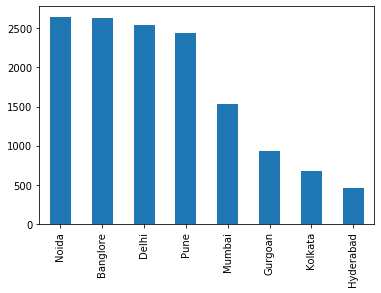

In [32]:
combined.Location_Cleansed.value_counts().plot(kind='bar')

In [33]:
combined.Cuisines.value_counts()

North Indian                                                         1076
North Indian, Chinese                                                 786
Fast Food                                                             553
South Indian                                                          336
Chinese                                                               303
Bakery                                                                219
Street Food                                                           211
Bakery, Desserts                                                      200
North Indian, Mughlai                                                 192
Pizza, Fast Food                                                      171
Chinese, North Indian                                                 152
Fast Food, Beverages                                                  138
North Indian, Fast Food                                               133
Biryani                               

In [34]:
combined.Cuisines[0].split(",")

['Fast Food', ' Rolls', ' Burger', ' Salad', ' Wraps']

In [35]:
food=[]
for i in combined.Cuisines:
    food.append(i.split(","))
    

In [36]:
df=pd.DataFrame(food)

In [37]:
df.head()

,0,1,2,3,4,5,6,7
0,Fast Food,Rolls,Burger,Salad,Wraps,None,None,None
1,Ice Cream,Desserts,None,None,None,None,None,None
2,Italian,Street Food,Fast Food,None,None,None,None,None
3,Mughlai,North Indian,Chinese,None,None,None,None,None
4,Cafe,Beverages,None,None,None,None,None,None


In [38]:
df[0].unique()

array(['Fast Food', 'Ice Cream', 'Italian', 'Mughlai', 'Cafe',
       'South Indian', 'Beverages', 'Chinese', 'Mithai', 'North Indian',
       'Burger', 'Biryani', 'Kerala', 'Desserts', 'Bakery', 'Asian',
       'Street Food', 'Pizza', 'Lucknowi', 'Tea', 'Rolls', 'Bengali',
       'Mishti', 'European', 'Momos', 'Continental', 'Andhra', 'German',
       'Finger Food', 'Sandwich', 'Chettinad', 'Juices', 'Parsi',
       'Japanese', 'Salad', 'Tamil', 'North Eastern', 'Maharashtrian',
       'Tibetan', 'Arabian', 'Bar Food', 'Konkan', 'Odia', 'Paan',
       'Wraps', 'Lebanese', 'American', 'Mediterranean', 'Bohri',
       'Mangalorean', 'Thai', 'Healthy Food', 'Raw Meats', 'Gujarati',
       'Seafood', 'Rajasthani', 'BBQ', 'Coffee', 'Mexican', 'Goan',
       'Korean', 'Kebab', 'Kashmiri', 'Bihari', 'Portuguese',
       'Frozen Yogurt', 'Afghan', 'Awadhi', 'Malwani', 'Malaysian',
       'Hyderabadi', 'French', 'Modern Indian', 'Sushi', 'Hot dogs',
       'Iranian', 'Brazilian', 'Indian', 'Af

In [39]:
fastfood=['Fast Food','Cafe','Chinese','Burger','Street Food', 'Pizza','Tea', 'Rolls','Momos','Finger Food', 'Sandwich'
          ,'Bar Food'
          ,'Wraps','Hot dogs']
desserts=['Ice Cream','Mithai','Desserts', 'Bakery','Mishti','Paan','Frozen Yogurt']
main=['Italian', 'Mughlai','South Indian','North Indian','Biryani', 'Kerala','Asian','Lucknowi','Bengali','European'
      ,'Continental'
      , 'Andhra', 'German','Chettinad','Parsi',
     'Japanese', 'Salad', 'Tamil', 'North Eastern', 'Maharashtrian','Tibetan', 'Arabian','Konkan', 'Odia','Lebanese'
      , 'American'
      , 'Mediterranean', 'Bohri',
     'Mangalorean', 'Thai', 'Healthy Food''Raw Meats', 'Gujarati','Seafood', 'Rajasthani', 'BBQ','Mexican', 'Goan','Afghan',
      'Awadhi', 'Malwani',
      'Malaysian','Hyderabadi', 'French', 'Modern Indian', 'Sushi','Iranian', 'Brazilian', 'Indian', 'African','Turkish',
      'Assamese', 'Naga', 'Middle Eastern', 'Vietnamese',
     'Steak','Charcoal Chicken','Nepalese','Cantonese','Belgian','Tex-Mex','Malwani','Burmese','Spanish','Roast Chicken'
      ,'Indonesian', 'Bangladeshi', 'South American', 'Poké', 'Greek',
      'Israeli', 'Sri Lankan']
beverage=['Beverages','Juices','Tea','Coffee','Bubble Tea']

In [40]:
## function to convert the food into category
def foodcatbanao(x):
    if(x in fastfood):
        return("Fast Food")
    elif(x in beverage):
        return("Beverages")
    elif(x in desserts):
        return("Deserts")
    else:
        return("Main Course")

In [41]:
combined["Cuisines_Cleansed"]=pd.Series(df[0].apply(foodcatbanao))

In [42]:
combined[(combined.Location_Cleansed=='Pune')&(combined.Cuisines_Cleansed=="Fast Food")]["AvgCost_Cleansed"].describe()

count    1016.000000
mean      198.375984
std       127.440976
min         0.000000
25%       100.000000
50%       150.000000
75%       200.000000
max      1000.000000
Name: AvgCost_Cleansed, dtype: float64

In [43]:
## Imputing the missing value
combined.loc[combined.AvgCost_Cleansed==0,'AvgCost_Cleansed']=150

In [44]:
combined.loc[combined.Restaurant=="ID_6472"]

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,Minorder_Cleansed,AvgCost_Cleansed,Location_Cleansed,Cuisines_Cleansed
5988,ID_6472,"D-Block, Sector 63, Noida",Fast Food,₹200,₹99,3.7,1056,329,65 minutes,99,200,Noida,Fast Food
6297,ID_6472,Pune University,Fast Food,0,₹50,NEW,-,-,30 minutes,50,150,Pune,Fast Food


In [45]:
## Rating
combined.Rating.unique()

array(['3.5', '3.6', '3.7', '3.2', '3.8', '4.0', '3.9', '4.2', '-', '2.8',
       '3.0', '3.3', '3.1', '4.7', '3.4', '4.1', 'NEW', '2.9', '4.6',
       '4.3', '2.6', '4.5', '4.4', '4.8', '2.4', '2.7', '2.5',
       'Opening Soon', '2.2', '4.9', '2.3', '2.1', 'Temporarily Closed'],
      dtype=object)

In [46]:
combined.Rating.describe()

count     13868
unique       33
top           -
freq       1496
Name: Rating, dtype: object

In [47]:
combined.Rating=pd.to_numeric(combined.Rating,errors='coerce')

In [48]:
combined.Rating.fillna(value=3.6,inplace=True)

In [49]:
combined.Reviews=pd.to_numeric(combined.Reviews,errors='coerce')

In [50]:
combined.Reviews.fillna(value=26,inplace=True)

In [51]:
combined.Votes=pd.to_numeric(combined.Votes,errors='coerce')

In [52]:
combined.Votes.fillna(value=63,inplace=True)

In [53]:
combined.Votes.describe()

count    13868.000000
mean       207.463441
std        499.902608
min          3.000000
25%         25.000000
50%         63.000000
75%        156.000000
max       9054.000000
Name: Votes, dtype: float64

In [54]:
def rating_cat(x):
   if(x>=4.5):
       return("Excellent")
   elif(x>=4.0):
       return("Very Good")
   elif(x>=3.5):
       return("Good")
   elif(x>=3.0):
       return("Average")
   else:
       return("Poor")

In [55]:
combined["Rating_Category"]=pd.Series(combined.Rating.apply(rating_cat))

In [229]:
combined.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,Minorder_Cleansed,AvgCost_Cleansed,Location_Cleansed,Cuisines_Cleansed,Rating_Category,Rest_count,Rest_category
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12.0,4.0,30 minutes,50,200,Pune,Fast Food,Good,1,Single outlet
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11.0,4.0,30 minutes,50,100,Banglore,Deserts,Good,6,Chain
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99.0,30.0,65 minutes,50,150,Mumbai,Main Course,Good,3,Multiple
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176.0,95.0,30 minutes,99,250,Noida,Main Course,Good,2,Multiple
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521.0,235.0,65 minutes,99,200,Banglore,Fast Food,Average,1,Single outlet


In [230]:
# split the data in train and test
newtrain=combined.loc[:train.shape[0]-1]

In [231]:
newtest=combined.loc[11094:combined.shape[0]]

In [232]:
train_new=newtrain.drop(['Restaurant', 'Location', 'Cuisines', 'Average_Cost', 'Minimum_Order','Rating'],axis=1)

test_new=newtest.drop(['Restaurant', 'Location', 'Cuisines', 'Average_Cost', 'Minimum_Order','Rating','Delivery_Time'],axis=1)

C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


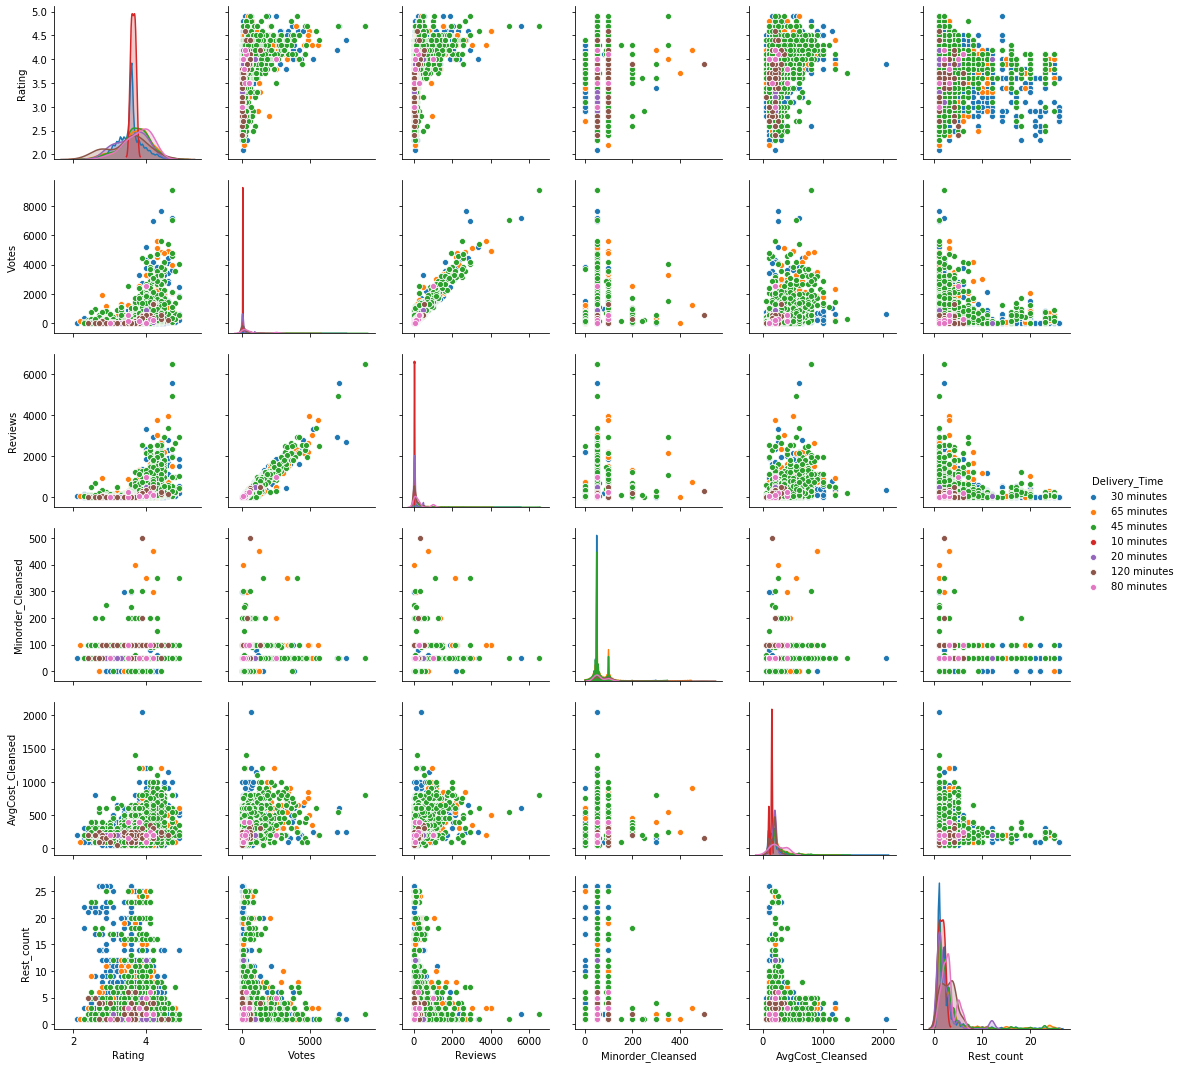

In [180]:
sns.pairplot(train_new,hue='Delivery_Time')

## Problem Statement - I want to find out if rating has an impact on the delivery time

##  null hypothesis
H0: there is no impact on delivery time vs rating.
## Alternate hypothesis 
H1: there is impact on delivery time vs rating . 
## test of significance - Anova / Ftest
since one columns in numerical and another in categorical 

    

In [233]:
import scipy.stats as stats
import statsmodels.api as sms # anova table library
from statsmodels.formula.api import ols # regression fit librarry

In [234]:
# lets fit ols
model=ols('Rating~Delivery_Time',data=train_new).fit()

PatsyError: Error evaluating factor: NameError: name 'Rating' is not defined
    Rating~Delivery_Time
    ^^^^^^

In [ ]:
sms.stats.anova_lm(model)

## summary of test
1. If columns are numericals in nature and no population matrix ig given then t-test is ideal test
2. If 1 column is numerical and other is categorical then the variance can be explained by ANOVA
3. If both columns are categorical in nature then use chi-square test of goodness of fit.# chi-square test isa right tailed test in nature

In [235]:
## p-value- probability of null hypothesis of being true

In [236]:
train_new.head()

,Votes,Reviews,Delivery_Time,Minorder_Cleansed,AvgCost_Cleansed,Location_Cleansed,Cuisines_Cleansed,Rating_Category,Rest_count,Rest_category
0,12.0,4.0,30 minutes,50,200,Pune,Fast Food,Good,1,Single outlet
1,11.0,4.0,30 minutes,50,100,Banglore,Deserts,Good,6,Chain
2,99.0,30.0,65 minutes,50,150,Mumbai,Main Course,Good,3,Multiple
3,176.0,95.0,30 minutes,99,250,Noida,Main Course,Good,2,Multiple
4,521.0,235.0,65 minutes,99,200,Banglore,Fast Food,Average,1,Single outlet


##  Introduction to ensembles

In [237]:
# dealing with target variable

from sklearn.preprocessing import StandardScaler,LabelEncoder

In [238]:
le=LabelEncoder() # created a machine called Le that has label encoder

In [239]:
train_new["Delivery_TimeCoded"]=le.fit_transform(train_new.Delivery_Time)

In [240]:
# drop the feature Delivery time
finaltrain=train_new.drop("Delivery_Time",axis=1)

In [241]:
finaltrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11094 entries, 0 to 11093
Data columns (total 10 columns):
Votes                 11094 non-null float64
Reviews               11094 non-null float64
Minorder_Cleansed     11094 non-null int64
AvgCost_Cleansed      11094 non-null int64
Location_Cleansed     11094 non-null object
Cuisines_Cleansed     11094 non-null object
Rating_Category       11094 non-null object
Rest_count            11094 non-null int64
Rest_category         11094 non-null object
Delivery_TimeCoded    11094 non-null int32
dtypes: float64(2), int32(1), int64(3), object(4)
memory usage: 823.5+ KB


In [242]:
# applying one hot encoding
dummytrain=pd.get_dummies(finaltrain)


In [243]:
print(finaltrain.shape)
print(dummytrain.shape)

(11094, 10)
(11094, 26)


In [244]:
dummytrain.head()

,Votes,Reviews,Minorder_Cleansed,AvgCost_Cleansed,Rest_count,Delivery_TimeCoded,Location_Cleansed_Banglore,Location_Cleansed_Delhi,Location_Cleansed_Gurgoan,Location_Cleansed_Hyderabad,...,Cuisines_Cleansed_Fast Food,Cuisines_Cleansed_Main Course,Rating_Category_Average,Rating_Category_Excellent,Rating_Category_Good,Rating_Category_Poor,Rating_Category_Very Good,Rest_category_Chain,Rest_category_Multiple,Rest_category_Single outlet
0,12.0,4.0,50,200,1,3,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
1,11.0,4.0,50,100,6,3,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,99.0,30.0,50,150,3,5,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
3,176.0,95.0,99,250,2,3,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
4,521.0,235.0,99,200,1,5,1,0,0,0,...,1,0,1,0,0,0,0,0,0,1


In [245]:
# split the data in train and test
from sklearn.model_selection import train_test_split

In [246]:
x=dummytrain.drop("Delivery_TimeCoded",axis=1)
y=dummytrain.Delivery_TimeCoded

In [247]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=10)

In [248]:
# scaling the dataset
sc=StandardScaler()

In [249]:
scaled_train=pd.DataFrame(sc.fit_transform(xtrain),columns=xtrain.columns)

In [250]:
xtest=pd.DataFrame(sc.transform(xtest),columns= xtest.columns)

In [251]:
# knn model
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [252]:
#prediction
pred_knn=knn.fit(scaled_train,ytrain).predict(xtest)

In [253]:
#checking model metrics

from sklearn.metrics import accuracy_score,cohen_kappa_score,matthews_corrcoef

In [254]:
print("The accuracy :",accuracy_score(ytest,pred_knn))
print("The kappa score :",cohen_kappa_score(ytest,pred_knn))
print("The mcc is :",matthews_corrcoef(ytest,pred_knn))



The accuracy : 0.6998648039657503
The kappa score : 0.2919601752931015
The mcc is : 0.30682423092539934


In [255]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion="entropy")

In [256]:
pred_rf=rf.fit(scaled_train,ytrain).predict(xtest)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [257]:
print("The accuracy :",accuracy_score(ytest,pred_rf))
print("The kappa score :",cohen_kappa_score(ytest,pred_rf))
print("The mcc is :",matthews_corrcoef(ytest,pred_rf))


The accuracy : 0.7940513744930149
The kappa score : 0.546125983145376
The mcc is : 0.5527583579637612


In [258]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion= 'entropy')

In [259]:
pred = dtree.fit(scaled_train,ytrain).predict(xtest)

In [260]:
print("The accuracy :",accuracy_score(ytest,pred))
print("The kappa score :",cohen_kappa_score(ytest,pred))
print("The mcc is :",matthews_corrcoef(ytest,pred))


The accuracy : 0.765209553853087
The kappa score : 0.5153963747543132
The mcc is : 0.5155732986717539



## voting classifier 
it is ensemble method with the estimators to be defined by the ml specialist

In [278]:
# Ensemble Model -- voting classifier
## hard voting
from sklearn.ensemble import VotingClassifier
vc=VotingClassifier(estimators=[("tree",dtree),("random",rf),("GBM",gbm)])

In [279]:
pred_vc = vc.fit(scaled_train,ytrain).predict(xtest)

In [280]:
print("The accuracy :",accuracy_score(ytest,pred_vc))
print("The kappa score :",cohen_kappa_score(ytest,pred_vc))
print("The mcc is :",matthews_corrcoef(ytest,pred_vc))


The accuracy : 0.8102748986029743
The kappa score : 0.577251470932953
The mcc is : 0.5866708718689707


In [264]:
## soft voting
from sklearn.ensemble import VotingClassifier
vc=VotingClassifier(estimators=[("tree",dtree),("random",rf),("KNN",knn)],voting='soft')

In [265]:
pred_vc_soft = vc.fit(scaled_train,ytrain).predict(xtest)

In [266]:
print("The accuracy :",accuracy_score(ytest,pred_vc_soft))
print("The kappa score :",cohen_kappa_score(ytest,pred_vc_soft))
print("The mcc is :",matthews_corrcoef(ytest,pred_vc_soft))


The accuracy : 0.800811176205498
The kappa score : 0.5657403504546276
The mcc is : 0.5711228236609992


## Boosting

In [267]:
## Gradient boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier()

In [268]:
pred_gbm=gbm.fit(scaled_train,ytrain).predict(xtest)

In [269]:
print("The accuracy :",accuracy_score(ytest,pred_gbm))
print("The kappa score :",cohen_kappa_score(ytest,pred_gbm))
print("The mcc is :",matthews_corrcoef(ytest,pred_gbm))


The accuracy : 0.7413249211356467
The kappa score : 0.4050763280159294
The mcc is : 0.4175794746606827


In [270]:
from sklearn.model_selection import cross_val_score

In [271]:
cross_val_score(estimator=gbm,X=scaled_train,y=ytrain,cv=5).mean()

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


0.736117125858186

In [272]:
## Adaboost
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()

In [273]:
pred_ada=ada.fit(scaled_train,ytrain).predict(xtest)

In [274]:
print("The accuracy :",accuracy_score(ytest,pred_ada))
print("The kappa score :",cohen_kappa_score(ytest,pred_ada))
print("The mcc is :",matthews_corrcoef(ytest,pred_ada))


The accuracy : 0.6782334384858044
The kappa score : 0.34280269720490186
The mcc is : 0.34843363756899115


In [275]:
# bagging classifier
from sklearn.ensemble import BaggingClassifier
bagg=BaggingClassifier()

In [276]:
pred_bag=bagg.fit(scaled_train,ytrain).predict(xtest)

In [277]:
print("The accuracy :",accuracy_score(ytest,pred_bag))
print("The kappa score :",cohen_kappa_score(ytest,pred_bag))
print("The mcc is :",matthews_corrcoef(ytest,pred_bag))


The accuracy : 0.7836863452005408
The kappa score : 0.5299042127753668
The mcc is : 0.5340346625553489


In [227]:
## Feature - Restaurant count

In [228]:
combined.Restaurant.value_counts()

ID_5538    26
ID_7184    25
ID_2483    24
ID_7295    23
ID_1209    23
ID_4654    23
ID_5321    22
ID_4625    21
ID_2301    20
ID_7750    20
ID_1140    20
ID_8511    19
ID_5708    18
ID_4906    17
ID_188     17
ID_3970    17
ID_7564    17
ID_7544    16
ID_694     16
ID_720     16
ID_3969    16
ID_2542    15
ID_7260    14
ID_6229    14
ID_2402    14
ID_5952    13
ID_2794    12
ID_686     12
ID_5885    12
ID_7501    12
           ..
ID_2875     1
ID_5624     1
ID_5185     1
ID_6644     1
ID_3014     1
ID_5064     1
ID_4323     1
ID_4159     1
ID_4816     1
ID_5829     1
ID_4013     1
ID_3569     1
ID_7286     1
ID_3165     1
ID_2129     1
ID_6046     1
ID_3196     1
ID_539      1
ID_7231     1
ID_131      1
ID_4421     1
ID_4933     1
ID_4614     1
ID_759      1
ID_8152     1
ID_8245     1
ID_1757     1
ID_4646     1
ID_1121     1
ID_1785     1
Name: Restaurant, Length: 8661, dtype: int64

In [170]:
combined["Rest_count"]=combined.groupby("Restaurant")["Restaurant"].transform("count")

In [171]:
combined.Rest_count.describe()

count    13868.000000
mean         2.883473
std          3.707890
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         26.000000
Name: Rest_count, dtype: float64

01- single outlet, uptill 3 : multiple restaurant, >3:chain

In [172]:
def restcat(x):
    if(x>3):
        return("Chain")
    elif(x<=3) & (x>1):
        return("Multiple")
    else:
        return("Single outlet")

In [173]:
combined["Rest_category"]=combined.Rest_count.apply(restcat)

In [294]:
## kaggle submission for test data now

In [305]:
dummytest=pd.get_dummies(test_new)

In [319]:
print(dummytest.shape)
print(scaled_train.shape)

(2774, 25)
(8875, 25)


In [307]:
dummytrain.head()

,Votes,Reviews,Minorder_Cleansed,AvgCost_Cleansed,Rest_count,Delivery_TimeCoded,Location_Cleansed_Banglore,Location_Cleansed_Delhi,Location_Cleansed_Gurgoan,Location_Cleansed_Hyderabad,...,Cuisines_Cleansed_Fast Food,Cuisines_Cleansed_Main Course,Rating_Category_Average,Rating_Category_Excellent,Rating_Category_Good,Rating_Category_Poor,Rating_Category_Very Good,Rest_category_Chain,Rest_category_Multiple,Rest_category_Single outlet
0,12.0,4.0,50,200,1,3,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
1,11.0,4.0,50,100,6,3,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,99.0,30.0,50,150,3,5,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
3,176.0,95.0,99,250,2,3,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
4,521.0,235.0,99,200,1,5,1,0,0,0,...,1,0,1,0,0,0,0,0,0,1


In [308]:
dummytest.head()

,Votes,Reviews,Minorder_Cleansed,AvgCost_Cleansed,Rest_count,Location_Cleansed_Banglore,Location_Cleansed_Delhi,Location_Cleansed_Gurgoan,Location_Cleansed_Hyderabad,Location_Cleansed_Kolkata,...,Cuisines_Cleansed_Fast Food,Cuisines_Cleansed_Main Course,Rating_Category_Average,Rating_Category_Excellent,Rating_Category_Good,Rating_Category_Poor,Rating_Category_Very Good,Rest_category_Chain,Rest_category_Multiple,Rest_category_Single outlet
11094,361.0,225.0,50,350,1,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
11095,63.0,26.0,50,100,1,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
11096,36.0,16.0,50,100,2,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
11097,66.0,33.0,50,200,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
11098,38.0,14.0,50,150,2,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0


In [309]:
# scaling 
sc=StandardScaler()

In [310]:
train.columns

Index(['Votes', 'Reviews', 'Minorder_Cleansed', 'AvgCost_Cleansed',
       'Rest_count', 'Location_Cleansed_Banglore', 'Location_Cleansed_Delhi',
       'Location_Cleansed_Gurgoan', 'Location_Cleansed_Hyderabad',
       'Location_Cleansed_Kolkata', 'Location_Cleansed_Mumbai',
       'Location_Cleansed_Noida', 'Location_Cleansed_Pune',
       'Cuisines_Cleansed_Beverages', 'Cuisines_Cleansed_Deserts',
       'Cuisines_Cleansed_Fast Food', 'Cuisines_Cleansed_Main Course',
       'Rating_Category_Average', 'Rating_Category_Excellent',
       'Rating_Category_Good', 'Rating_Category_Poor',
       'Rating_Category_Very Good', 'Rest_category_Chain',
       'Rest_category_Multiple', 'Rest_category_Single outlet'],
      dtype='object')

In [313]:
train_scaled=pd.DataFrame(sc.fit_transform(dummytrain.drop("Delivery_TimeCoded",axis=1)))

In [314]:
cols=dummytrain.columns[dummytrain.columns!="Delivery_TimeCoded"]

In [315]:
test_scaled=pd.DataFrame(sc.fit_transform(dummytest),columns=dummytest.columns)

In [316]:
test_scaled.columns

Index(['Votes', 'Reviews', 'Minorder_Cleansed', 'AvgCost_Cleansed',
       'Rest_count', 'Location_Cleansed_Banglore', 'Location_Cleansed_Delhi',
       'Location_Cleansed_Gurgoan', 'Location_Cleansed_Hyderabad',
       'Location_Cleansed_Kolkata', 'Location_Cleansed_Mumbai',
       'Location_Cleansed_Noida', 'Location_Cleansed_Pune',
       'Cuisines_Cleansed_Beverages', 'Cuisines_Cleansed_Deserts',
       'Cuisines_Cleansed_Fast Food', 'Cuisines_Cleansed_Main Course',
       'Rating_Category_Average', 'Rating_Category_Excellent',
       'Rating_Category_Good', 'Rating_Category_Poor',
       'Rating_Category_Very Good', 'Rest_category_Chain',
       'Rest_category_Multiple', 'Rest_category_Single outlet'],
      dtype='object')

In [317]:
# Ensemble Model -- voting classifier
## hard voting
from sklearn.ensemble import VotingClassifier
vc1=VotingClassifier(estimators=[("tree",dtree),("random",rf),("GBM",gbm)])

In [320]:
pred_vc1 = vc1.fit(train_scaled,dummytrain.Delivery_TimeCoded).predict(test_scaled)

In [ ]:
pd.DataFrame()

In [298]:
def convertpredictions(x):
    if(x==0):
        return("10 Minutes")
    elif(x==1):
        return("120 Minutes")
    elif(x==2):
        return("20 Minutes")
    elif(x==3):
        return("30 Minutes")
    elif(x==4):
        return("45 Minutes")
    elif(x==5):
        return("65 Minutes")
    else:
        return("80 Minutes")
    

In [ ]:
## understanding bias and variance
1.The statistical models are high on bias because these models are not able to capture the pattern well
and hence they are underperforming models.
2.in order to remove the effect of non learning for ml algorithm, we need to do lot of transformation so that th data is as per ML 
algo is as per the Ml algo which can help in understanding the pattern well.
3. Having said

In [322]:
df=pd.DataFrame(pred_vc1,columns=["Delivery_Time"])

In [323]:
df["Delivery_Time"]=df.Delivery_Time.apply(convertpredictions)

In [324]:
df.to_excel("Delivery_Time.xlsx",index=False)